In [112]:
# bru, have to see the god damn video
import pandas as pd
import numpy as np

df=pd.DataFrame({'x':[12,24,28,33,18,29,52,45,24,55,51,61,53,69,72,64,49,58],
                  'y':[36,39,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7]})
                           

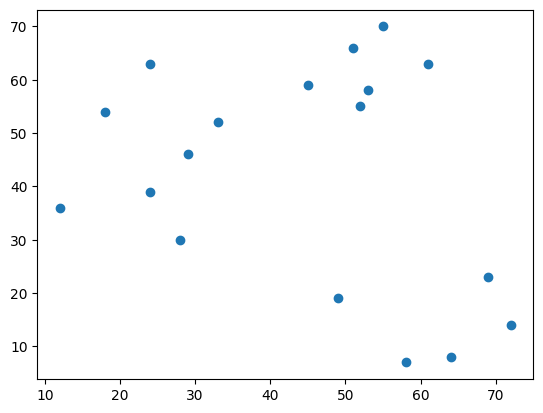

In [113]:
import matplotlib.pyplot as plt
plt.scatter(df.x , df.y)
plt.show()

In [114]:
cent = list()
min_x, max_x, min_y, max_y = df['x'].min(), df['x'].max(), df['y'].min(), df['y'].max()
for _ in range(3):
    x, y = np.random.randint(min_x, max_x), np.random.randint(min_y, max_y)
    cent.append([x, y])
print(cent)

[[26, 47], [60, 29], [63, 53]]


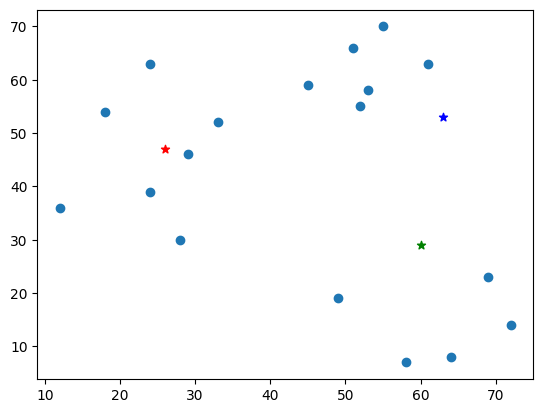

In [115]:
plt.scatter(df.x, df.y)
color = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(cent[i][0], cent[i][1], c=color[i], marker='*')
plt.show()

In [116]:
for i in range(3):
    df[color[i]] = np.sqrt((df.x - cent[i][0])**2 + (df.y - cent[i][1])**2)
df.head()

,x,y,r,g,b
0,12,36,17.804494,48.507731,53.758720
1,24,39,8.246211,37.363083,41.436699
2,28,30,17.117243,32.015621,41.880783
3,33,52,8.602325,35.468296,30.016662
4,18,54,10.630146,48.877398,45.011110


In [117]:
df['label'] = df.loc[:,['r','g', 'b']].idxmin(axis='columns')
df.head()

,x,y,r,g,b,label
0,12,36,17.804494,48.507731,53.758720,r
1,24,39,8.246211,37.363083,41.436699,r
2,28,30,17.117243,32.015621,41.880783,r
3,33,52,8.602325,35.468296,30.016662,r
4,18,54,10.630146,48.877398,45.011110,r


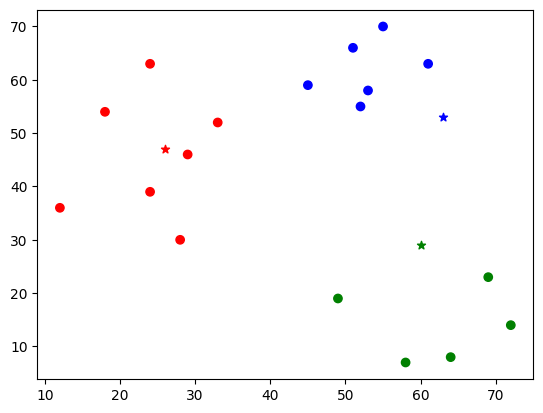

In [118]:
plt.scatter(df.x, df.y, c = df['label'])
for i in range(3):
    plt.scatter(cent[i][0], cent[i][1], c = color[i],marker='*')
plt.show()

In [119]:
df.head()

,x,y,r,g,b,label
0,12,36,17.804494,48.507731,53.758720,r
1,24,39,8.246211,37.363083,41.436699,r
2,28,30,17.117243,32.015621,41.880783,r
3,33,52,8.602325,35.468296,30.016662,r
4,18,54,10.630146,48.877398,45.011110,r


In [120]:
cluster_avg = df.groupby('label')[['x', 'y']].mean()

In [121]:
for i in range(3):
    cent[i] = list(cluster_avg.loc[color[i]])

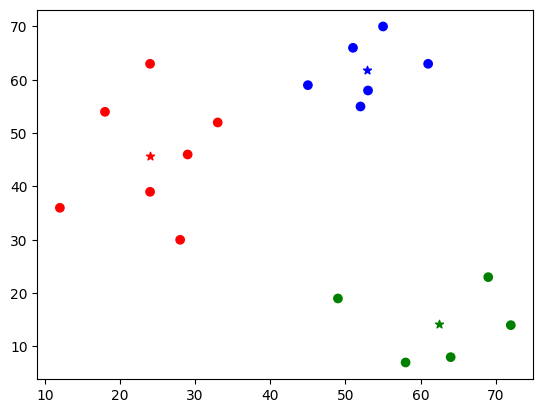

In [122]:
plt.scatter(df.x, df.y, c=df.label)
for i in range(3):
    plt.scatter(cent[i][0], cent[i][1], c=color[i], marker='*')
plt.show()

In [123]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3)
df = df.loc[:, ['x', 'y']]
model1.fit(df)

c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [124]:
df['label'] = model1.predict(df)


In [125]:
df.head()

,x,y,label
0,12,36,2
1,24,39,2
2,28,30,2
3,33,52,2
4,18,54,2


In [126]:
df = pd.read_csv("Call Center Data.csv")
df.head()

,Experience in months,Call Attended in a day
0,12,30
1,24,35
2,60,45
3,72,50
4,84,50


In [127]:
model_2 = KMeans(n_clusters=4)
model_2.fit(df)


c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [128]:
df['label'] = model_2.predict(df)

In [129]:
df.head()

,Experience in months,Call Attended in a day,label
0,12,30,1
1,24,35,1
2,60,45,3
3,72,50,3
4,84,50,3


In [ ]:
centers = model_2.cluster_centers_
centers

array([[82.33333333, 85.41025641],
       [27.84848485, 39.63636364],
       [28.76      , 83.68      ],
       [87.64285714, 39.14285714]])

In [ ]:
pd.DataFrame(centers, columns=['Experience in months', 'Call Attended in a day'])

,Experience in months,Call Attended in a day
0,82.333333,85.410256
1,27.848485,39.636364
2,28.760000,83.680000
3,87.642857,39.142857


In [ ]:
df.loc[df.label == 2]

,Experience in months,Call Attended in a day,label
9,14,81,2
10,22,82,2
14,21,75,2
15,33,72,2
17,32,77,2
86,15,75,2
87,17,84,2
88,20,94,2
89,22,98,2
90,18,83,2


In [131]:
df = pd.read_csv('mall.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [133]:
df_1 = df.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [134]:
losses = []
from sklearn.cluster import KMeans
for k in range(1, 12):
    model_3 = KMeans(n_clusters=k)
    model_3.fit(df_1)
    losses.append(model_3.inertia_)
losses

c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amalb\OneDrive\Desktop\deep learning\python_book\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

[308812.77999999997,
 212840.16982097185,
 143342.751571706,
 104366.151455562,
 75350.77917248776,
 58302.406308603684,
 51082.54296792137,
 44342.3173934174,
 40901.2569014319,
 37071.80528559619,
 35188.62405410681]

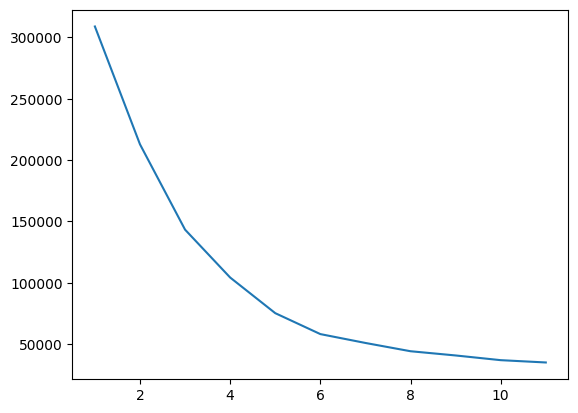

In [135]:
plt.plot(range(1, 12), losses)

In [136]:
pd.DataFrame(model_3.cluster_centers_, columns=df_1.columns)

,Age,Annual Income (k$),Spending Score (1-100)
0,37.100000,69.600000,37.300000
1,32.454545,108.181818,82.727273
2,24.413793,53.310345,51.862069
3,51.363636,25.363636,9.909091
4,41.000000,109.700000,22.000000
5,25.333333,25.095238,80.047619
6,61.692308,50.961538,50.153846
7,37.272727,26.181818,30.636364
8,32.785714,78.035714,81.892857
9,41.000000,80.181818,12.681818
